In [3]:
import pandas as pd

df = pd.read_csv("../../../../data/preprocessed_data.csv")

Separate between objective and independent variables

In [4]:
x = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

Divide the data between train and test data

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

Linear Discriminant Analysis Model

Model Evaluation with 1 features:
Accuracy: 0.6941747572815534
Recall: 0.8830239752513535
F1 Score: 0.7474020129285657
Selected Features: ['AgeCategory']

Model Evaluation with 2 features:
Accuracy: 0.7461858529819695
Recall: 0.8667826759474091
F1 Score: 0.7777585010409437
Selected Features: ['AgeCategory', 'GenHealth']

Model Evaluation with 3 features:
Accuracy: 0.7436100653853774
Recall: 0.7780355761794276
F1 Score: 0.7566754418954494
Selected Features: ['DiffWalking', 'AgeCategory', 'GenHealth']

Model Evaluation with 4 features:
Accuracy: 0.7348920150584506
Recall: 0.7211910286156226
F1 Score: 0.7359905288082084
Selected Features: ['DiffWalking', 'AgeCategory', 'Diabetic', 'GenHealth']

Model Evaluation with 5 features:
Accuracy: 0.7236972458886467
Recall: 0.6952822892498066
F1 Score: 0.7205690812543833
Selected Features: ['PhysicalHealth', 'DiffWalking', 'AgeCategory', 'Diabetic', 'GenHealth']

Model Evaluation with 6 features:
Accuracy: 0.7056667327125025
Recall: 0.6245166279969

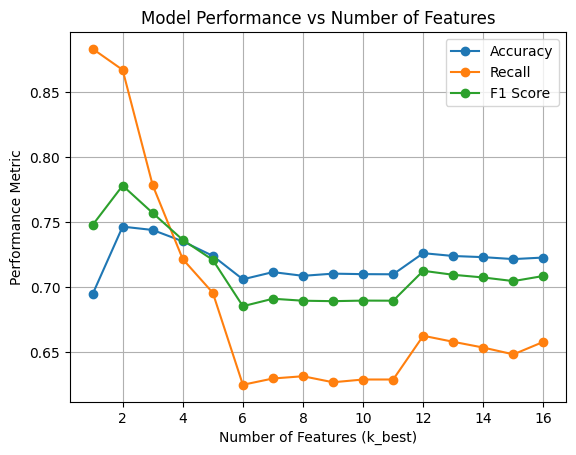

In [6]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Initialize lists to store results
feature_numbers_to_try = list(range(1, 17))
accuracy_scores = []
recall_scores = []
f1_scores = []

for k_best in feature_numbers_to_try:
    # Feature selection with mutual information
    selector = SelectKBest(score_func=mutual_info_classif, k=k_best)
    x_train_selected = selector.fit_transform(x_train, y_train)
    x_test_selected = selector.transform(x_test)

    # Initialize the Quadratic Discriminant Analysis model
    qda_model = QuadraticDiscriminantAnalysis()

    # Fit the model on the selected training data
    qda_model.fit(x_train_selected, y_train)

    # Make predictions on the selected test data
    y_pred = qda_model.predict(x_test_selected)

    # Evaluate the performance of the model
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append evaluation metrics to the lists
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print model evaluation for each number of features
    print(f"Model Evaluation with {k_best} features:")
    print(f"Accuracy: {accuracy}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Selected Features: {x_train.columns[selector.get_support()].tolist()}\n")

# Plot the results
plt.plot(feature_numbers_to_try, accuracy_scores, marker='o', label='Accuracy')
plt.plot(feature_numbers_to_try, recall_scores, marker='o', label='Recall')
plt.plot(feature_numbers_to_try, f1_scores, marker='o', label='F1 Score')

plt.title('Model Performance vs Number of Features')
plt.xlabel('Number of Features (k_best)')
plt.ylabel('Performance Metric')
plt.legend()
plt.grid(True)
plt.show()
